# READ DATA

In [1]:
import pandas as pd
basic_multi_probe_data = pd.read_csv("outputs/basic_multi_probe/results/1559273508.csv")

In [3]:
import json
with open('outputs/log_forest', 'r') as f:
    lsh_forest_data = list(map(eval, f))
lsh_forest_data = pd.DataFrame.from_records(lsh_forest_data)

In [4]:
total_data = pd.concat([basic_multi_probe_data, lsh_forest_data])

/Users/lizytalk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# SELECT PARAMMETERS FOR MULTI-PROBE LSH

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

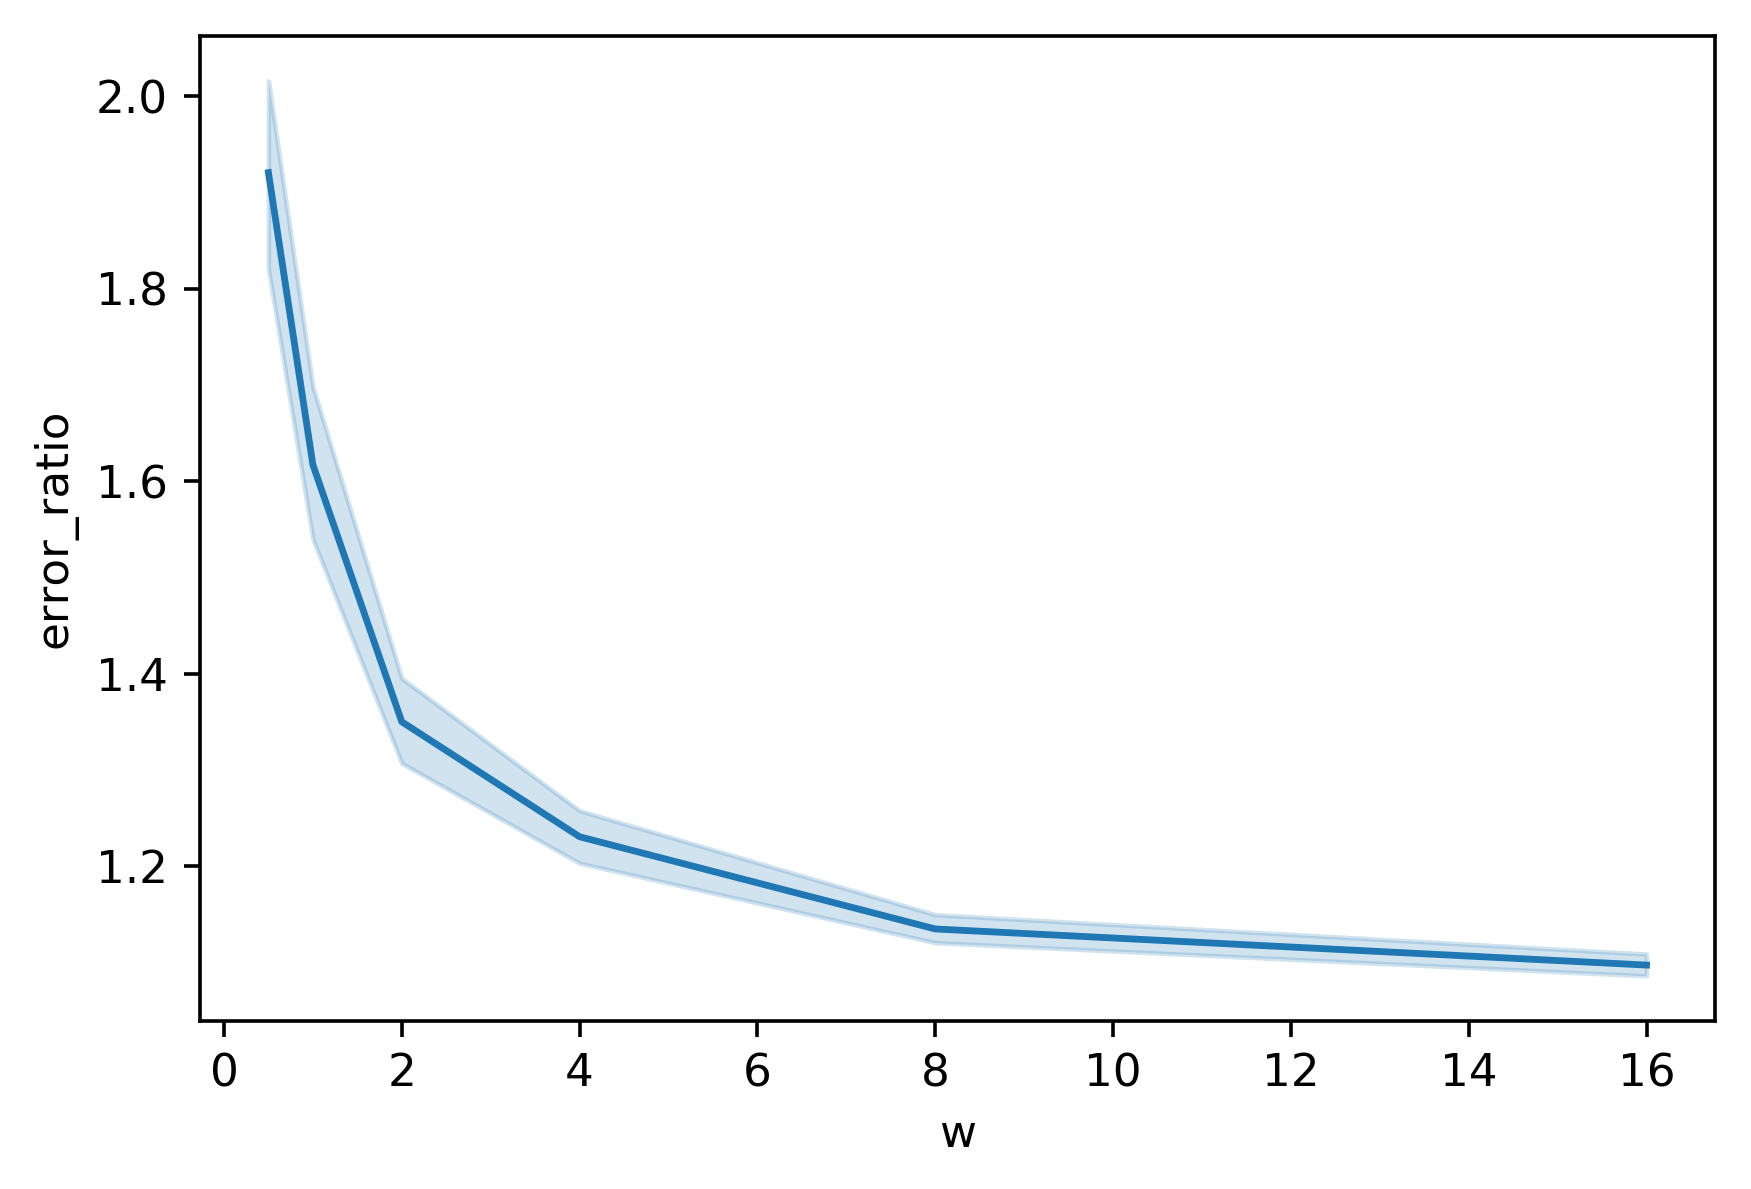

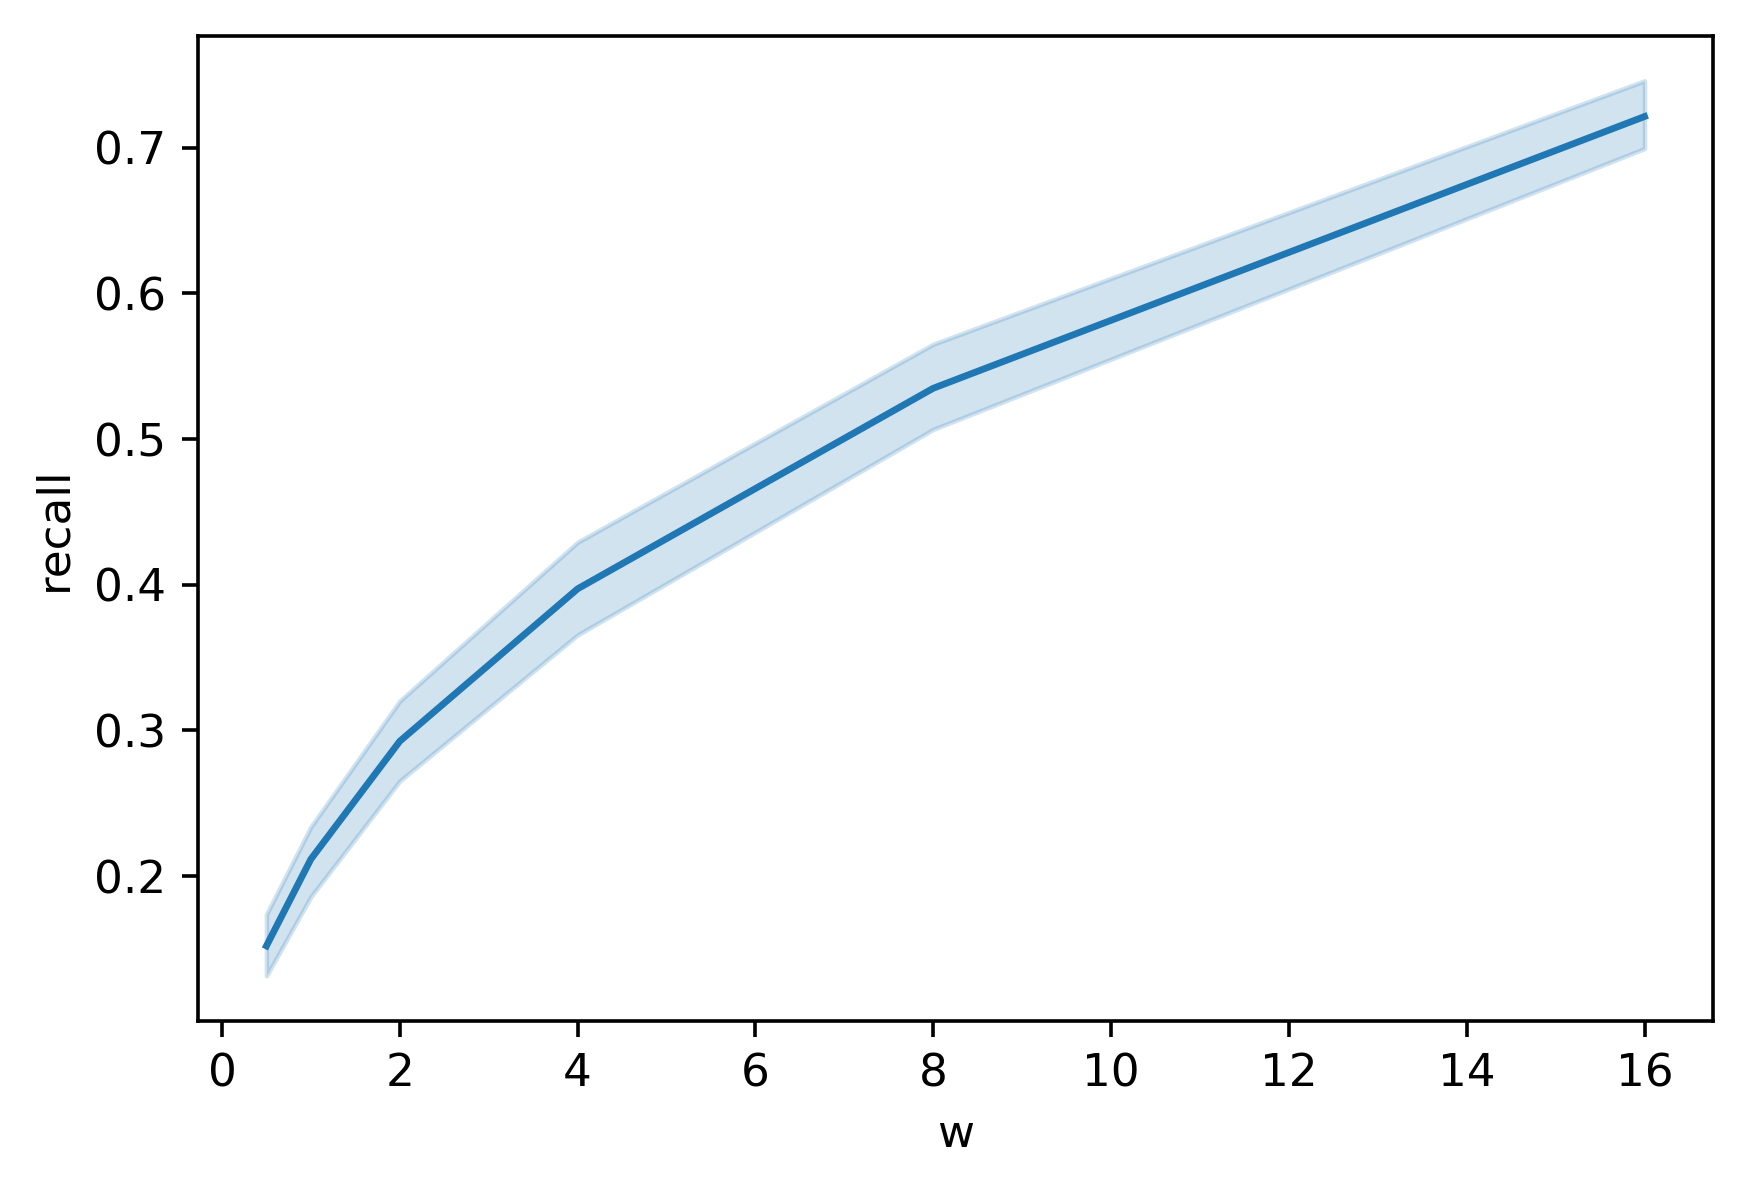

In [33]:
fig = plt.figure(dpi=326)
sns.lineplot(x='w', y='error_ratio', data=data)
plt.show()

fig = plt.figure(dpi=326)
sns.lineplot(x='w', y='recall', data=data)
plt.show()
plt.close()

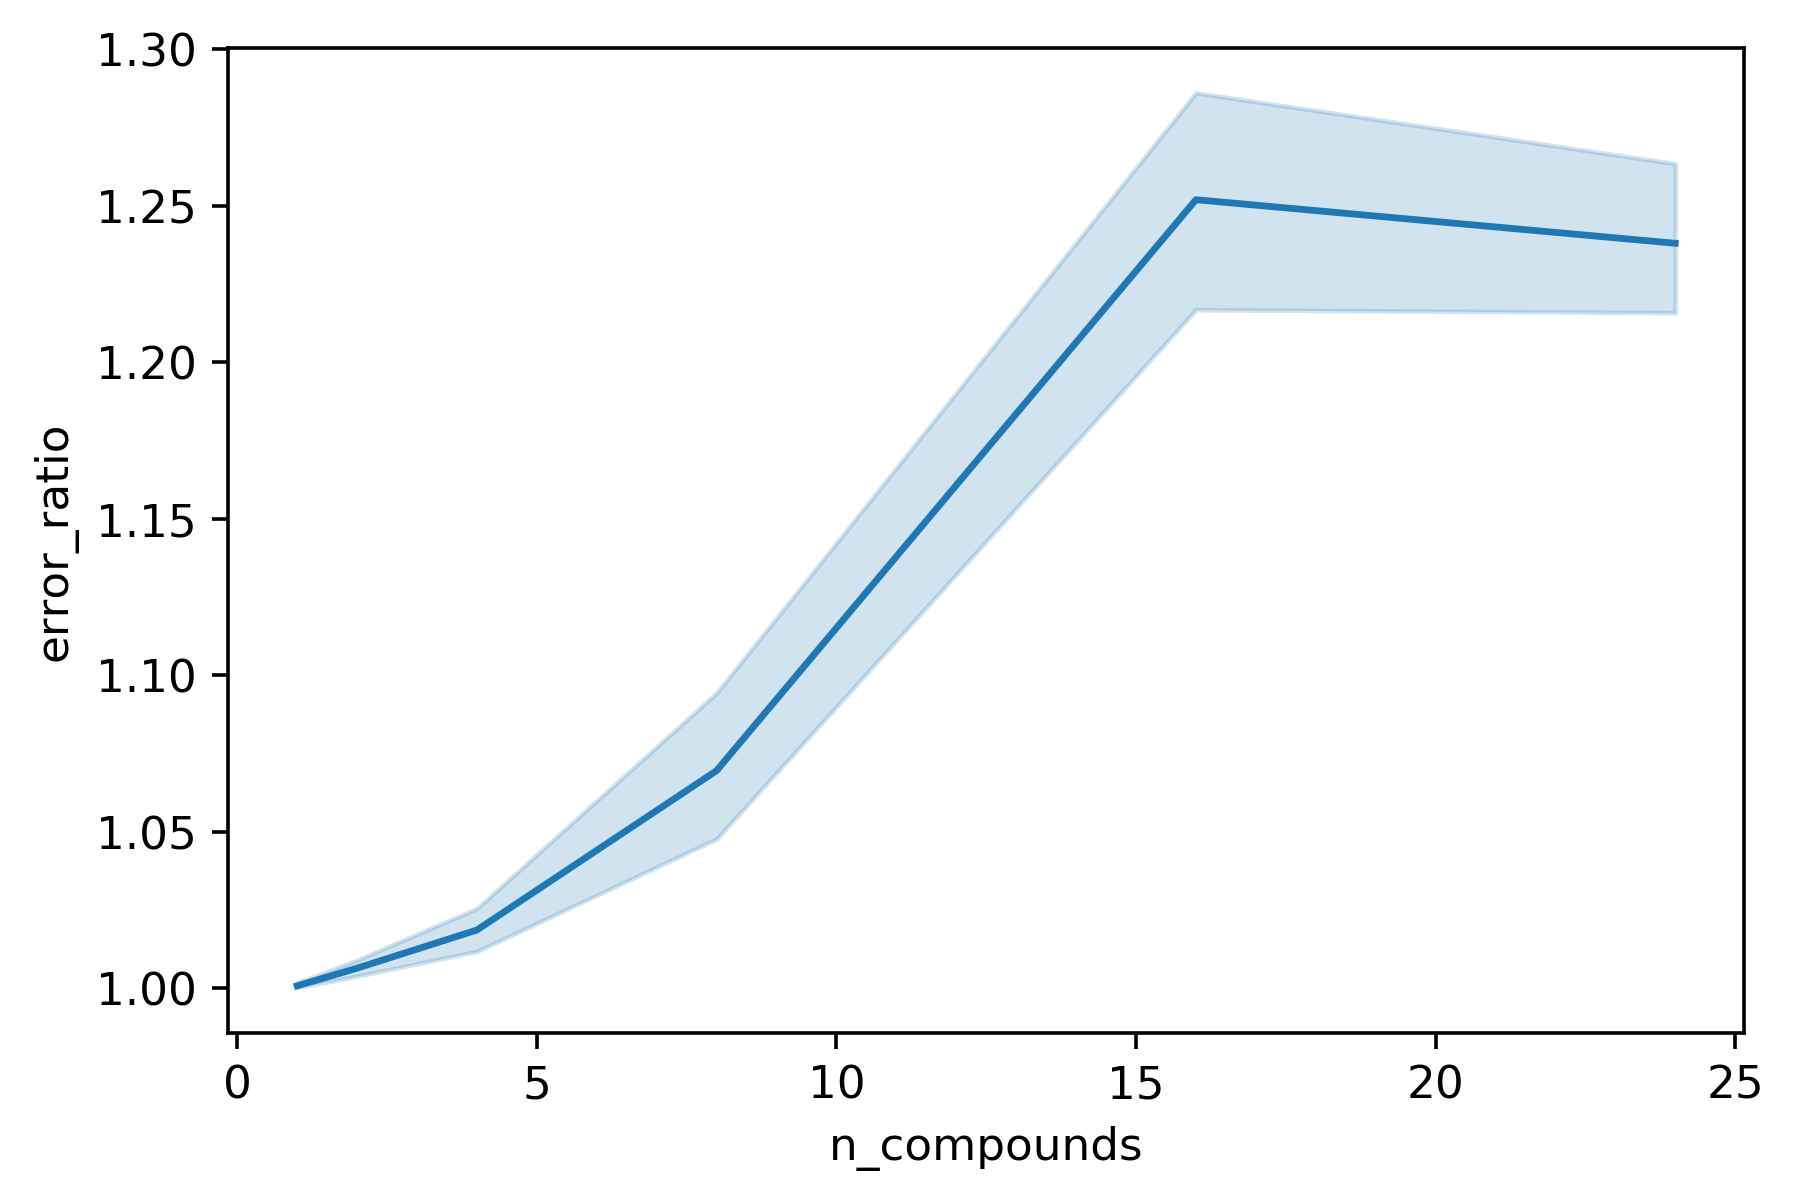

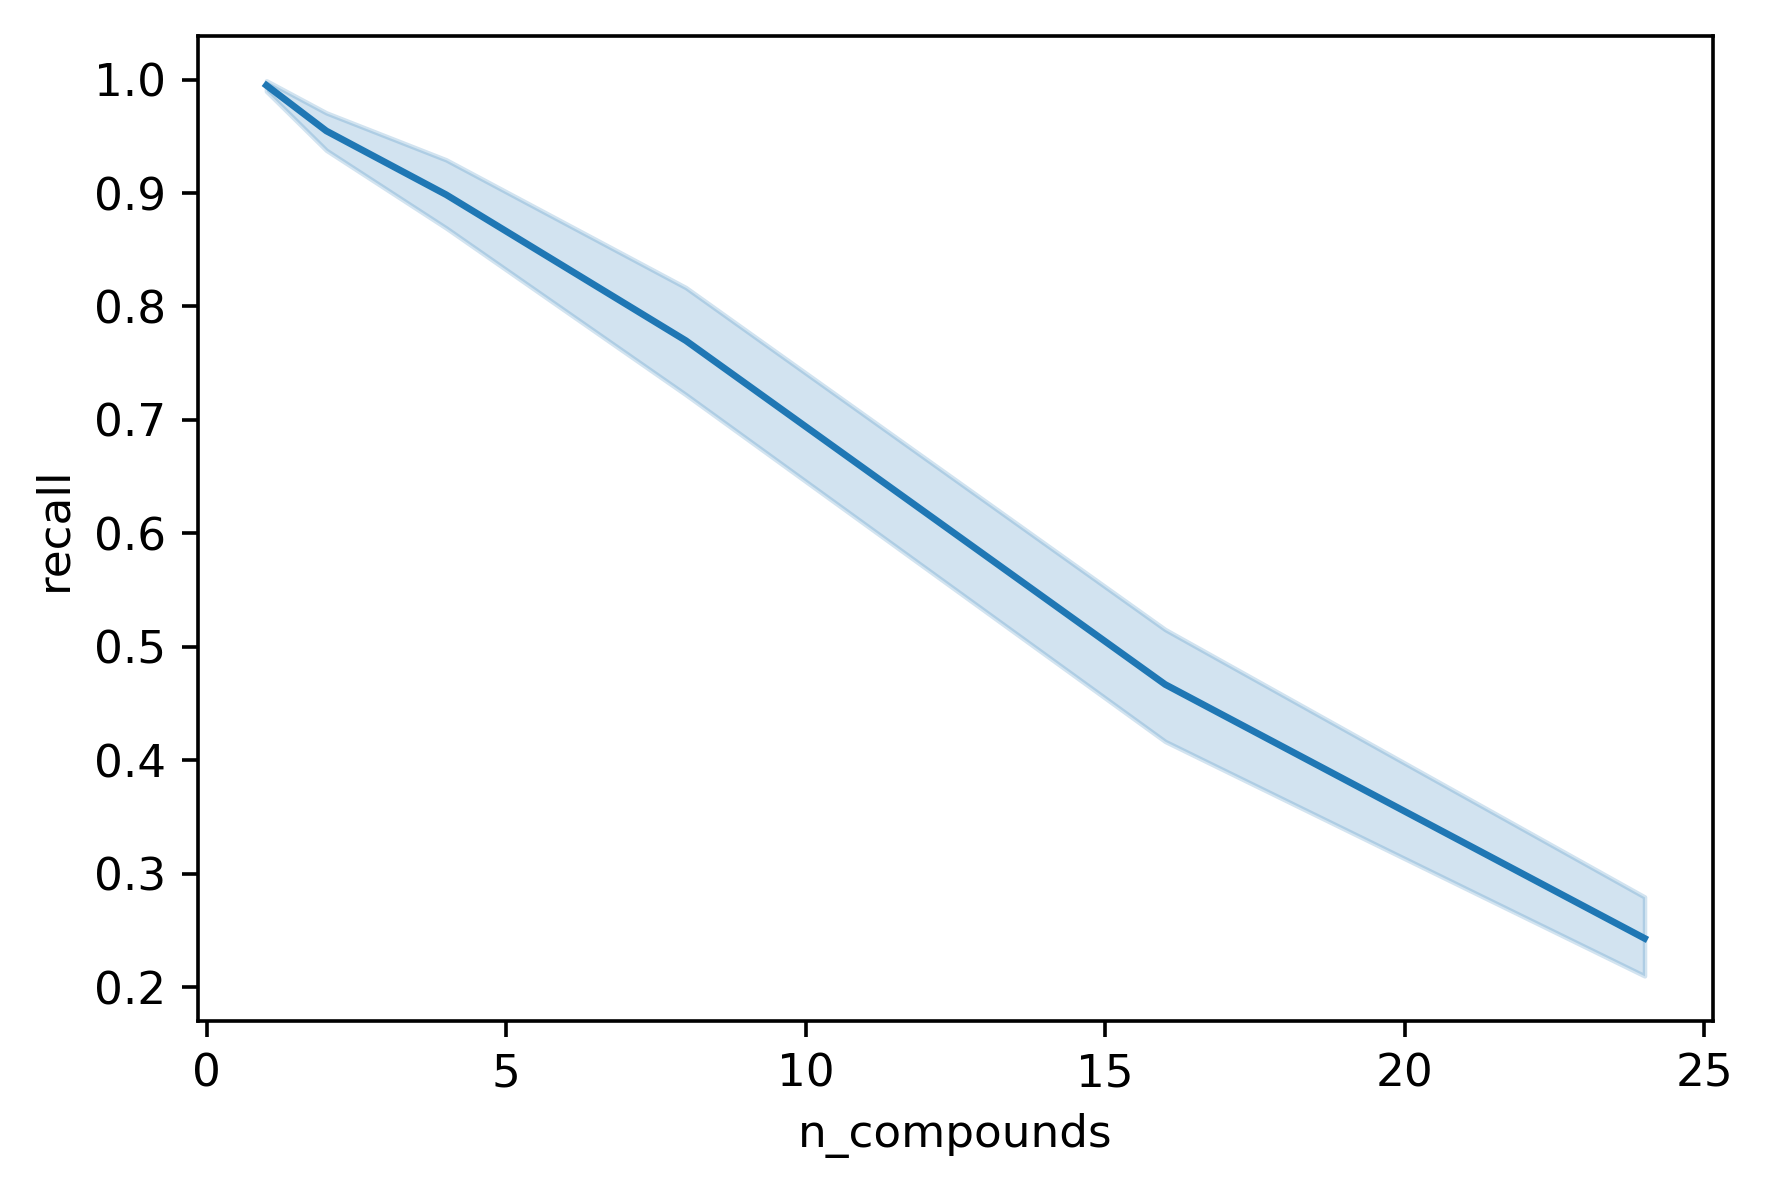

In [35]:
the_df = data[(data.w == 16.)]

fig = plt.figure(dpi=326)
sns.lineplot(x='n_compounds', y='error_ratio', data=the_df)
plt.show()

fig = plt.figure(dpi=326)
sns.lineplot(x='n_compounds', y='recall', data=the_df)
plt.show()
plt.close()

In [43]:
data = total_data
data = data[~(data.algorithm.isin(['BasicLSH', 'MultiProbeLSH'])) \
                  | ((data.w == 8.) & (data.n_compounds == 8))]
data = data[~(data.algorithm.isin(['MultiProbeLSH'])) \
                  | ((data.t == 16.))]

# PLOT RESULTS

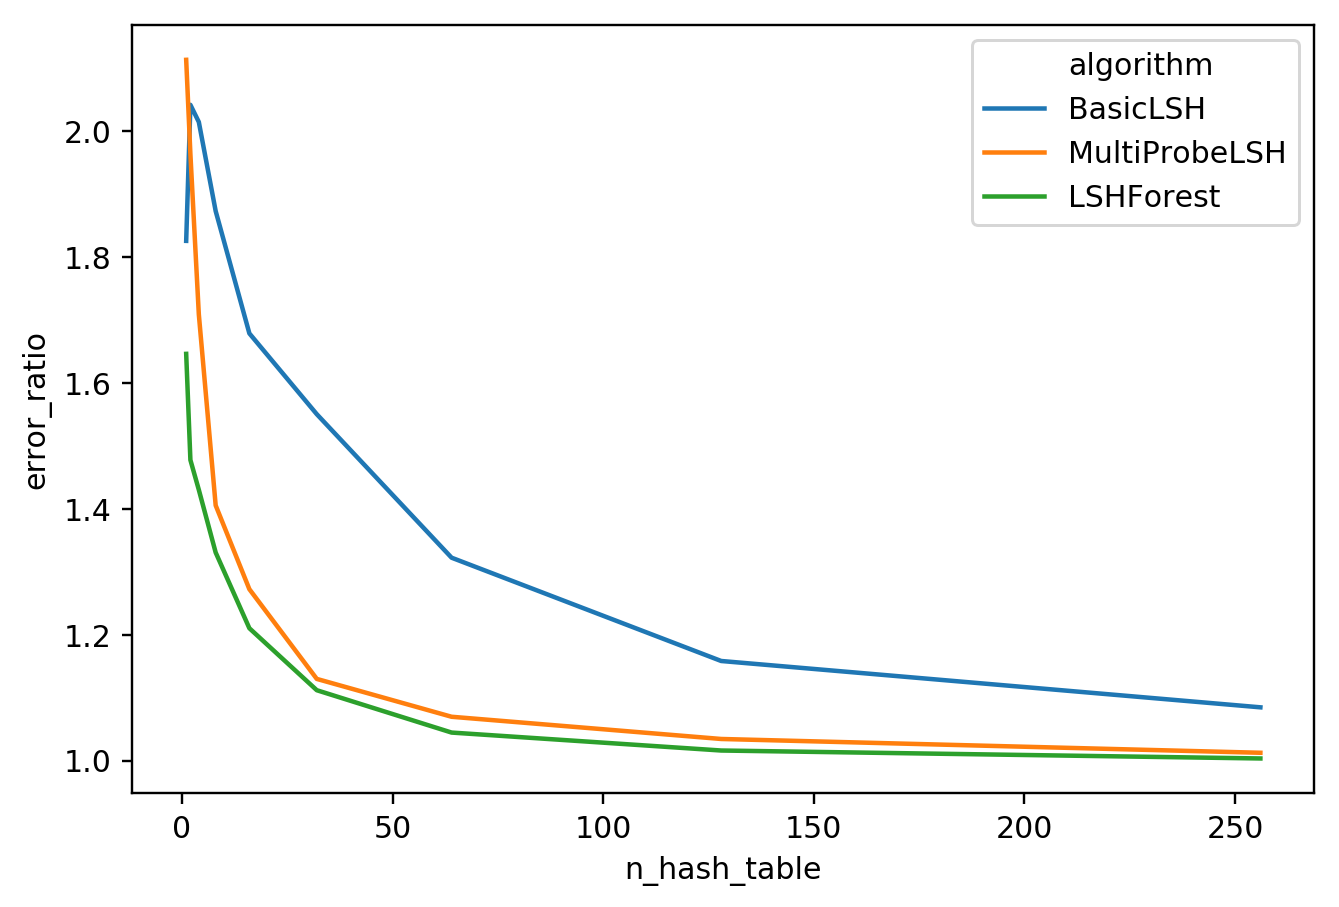

In [45]:
the_df = data

fig = plt.figure(dpi=216)
sns.lineplot(x='n_hash_table', y='error_ratio', hue='algorithm', data=the_df)
# plt.show()
plt.tight_layout(pad=0)
plt.savefig('presentation/figures/error_ratio.pdf')

fig = plt.figure(dpi=216)
sns.lineplot(x='n_hash_table', y='recall', hue='algorithm', data=the_df)
# plt.show()
plt.tight_layout(pad=0)
plt.savefig('presentation/figures/recall.pdf')
plt.close()

fig = plt.figure(dpi=216)
sns.lineplot(x='n_hash_table', y='c/n', hue='algorithm', data=the_df)
# plt.show()
plt.tight_layout(pad=0)
plt.savefig('presentation/figures/c_n.pdf')
plt.close()

fig = plt.figure(dpi=216)
sns.lineplot(x='n_hash_table', y='build_time', hue='algorithm', data=the_df)
# plt.show()
plt.tight_layout(pad=0)
plt.savefig('presentation/figures/build_time.pdf')
plt.close()

fig = plt.figure(dpi=216)
sns.lineplot(x='n_hash_table', y='search_time', hue='algorithm', data=the_df)
# plt.show()
plt.tight_layout(pad=0)
plt.savefig('presentation/figures/search_time.pdf')
plt.close()